In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

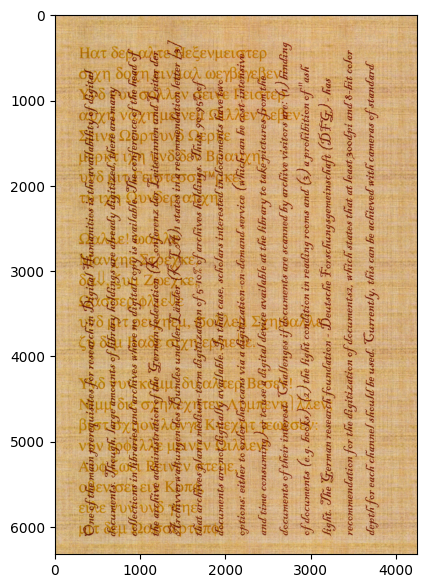

In [11]:
image = cv2.imread('./palimpsest-2024.jpg')

plt.figure(figsize=(15, 7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
blue_channel, green_channel, red_channel = cv2.split(image)

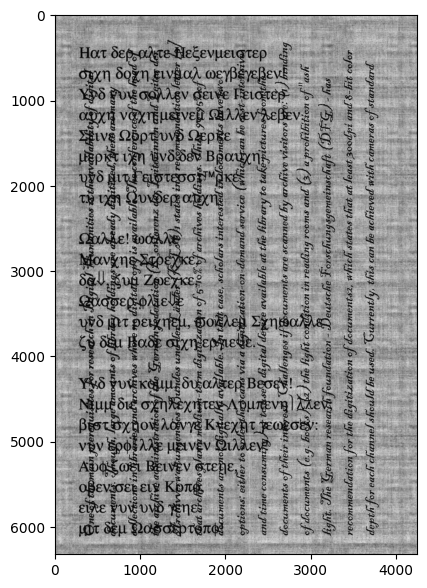

In [13]:
plt.figure(figsize=(15, 7))
plt.imshow(blue_channel, cmap='gray')
plt.show()

In [14]:
matrices = [('Red', red_channel), ('Green', green_channel), ('Blue', blue_channel)]

max_diff = 0
max_indices = (0, 0)

for i in range(len(matrices)):
    for j in range(i+1, len(matrices)):
        diff = np.sum(np.abs(matrices[i][1] - matrices[j][1]))
        if diff > max_diff:
            max_diff = diff
            max_indices = (i, j)

index1, matrix_with_max_diff1 = matrices[max_indices[0]]
index2, matrix_with_max_diff2 = matrices[max_indices[1]]

print("Matrices with the highest difference:")
print(index1, "Matrix")
print(index2, "Matrix")


Matrices with the highest difference:
Red Matrix
Blue Matrix


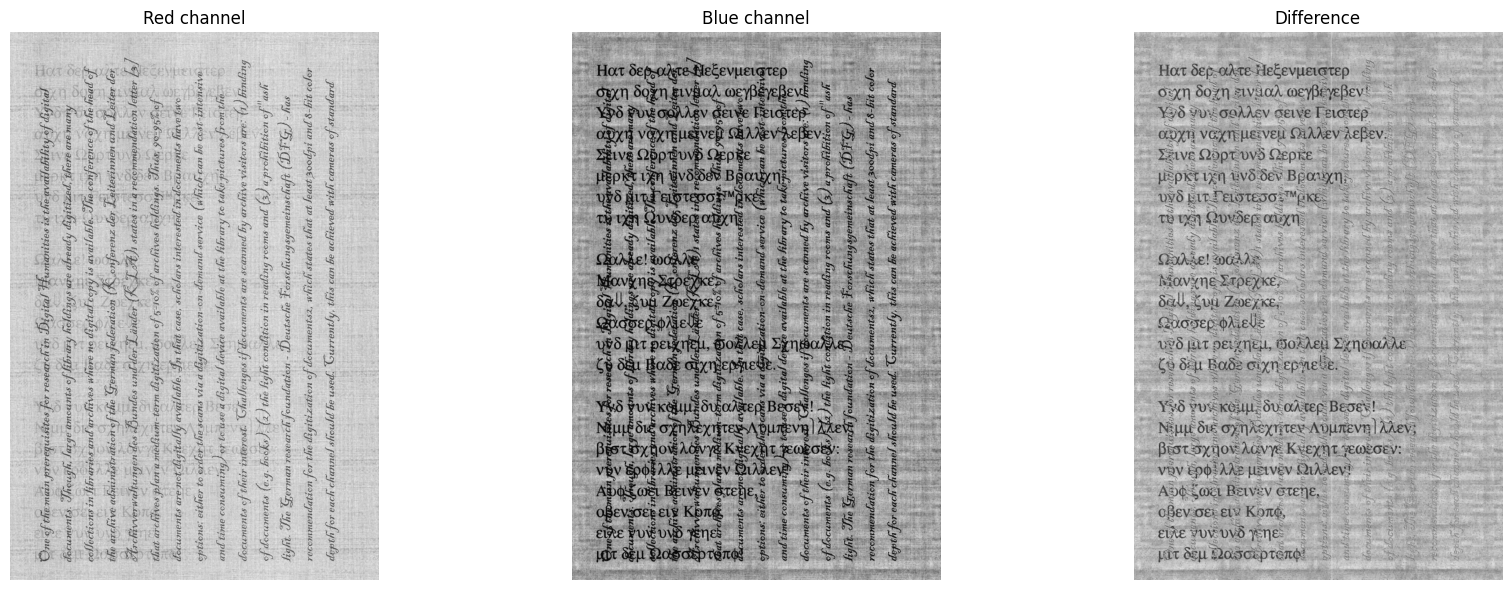

In [15]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue channel')
plt.axis('off')

# Creating the third subplot
plt.subplot(1, 3, 3)
plt.imshow(blue_channel-red_channel, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.tight_layout()

plt.show()

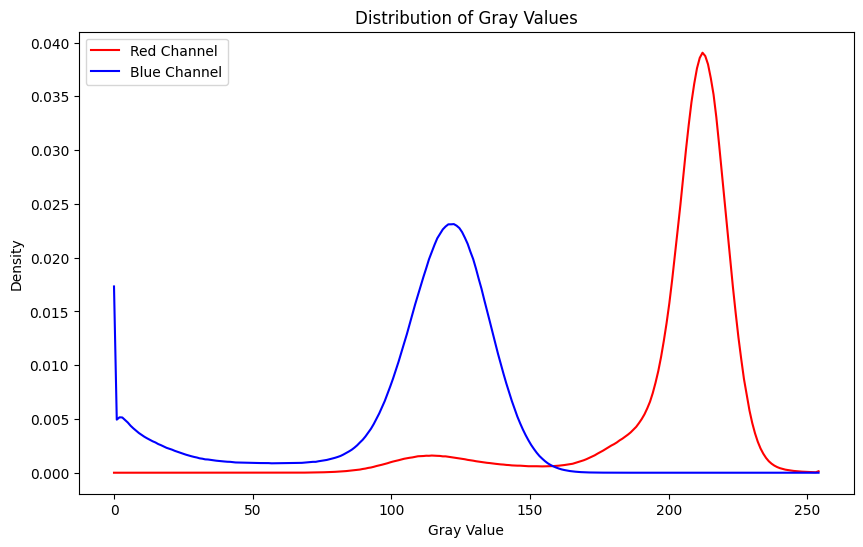

In [16]:
fl_img_1 = red_channel.flatten()
fl_img_2 = blue_channel.flatten()

histogram1, bins1 = np.histogram(fl_img_1, bins=256, range=(0, 255), density=True)
histogram2, bins2 = np.histogram(fl_img_2, bins=256, range=(0, 255), density=True)

plt.figure(figsize=(10, 6))
plt.plot(bins1[:-1], histogram1, color='red', label='Red Channel')
plt.plot(bins2[:-1], histogram2, color='blue', label='Blue Channel')
plt.title('Distribution of Gray Values')
plt.xlabel('Gray Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
print("Red channel")
unique_numbers, counts = np.unique(red_channel.flatten(), return_counts=True)
gr_vals_red = np.column_stack((unique_numbers, counts))

f_value = gr_vals_red[(gr_vals_red[:, 0] >= 100) & (gr_vals_red[:, 0] <= 130)]
r_f_value = f_value[np.argmax(f_value[:, 1])][0]
print("First gray value:", r_f_value)

s_value = gr_vals_red[(gr_vals_red[:, 0] >= 200) & (gr_vals_red[:, 0] <= 250)]
r_s_value = s_value[np.argmax(s_value[:, 1])][0]
print("Second gray value:", r_s_value)

Red channel
First gray value: 115
Second gray value: 213


In [18]:
print("Difference")
unique_numbers, counts = np.unique(blue_channel.flatten(), return_counts=True)
gr_vals_diff = np.column_stack((unique_numbers, counts))

f_value = gr_vals_diff[(gr_vals_diff[:, 0] >= 0) & (gr_vals_diff[:, 0] <= 50)]
d_f_value = f_value[np.argmax(f_value[:, 1])][0]
print("First gray value:", d_f_value)

s_value = gr_vals_diff[(gr_vals_diff[:, 0] >= 50) & (gr_vals_diff[:, 0] <= 150)]
d_s_value = s_value[np.argmax(s_value[:, 1])][0]
print("Second gray value:", d_s_value)

Difference
First gray value: 0
Second gray value: 123


In [19]:
scale_factor =  (d_s_value - d_f_value) / (r_s_value - r_f_value)
print("Scale factor:", scale_factor)

Scale factor: 1.2551020408163265


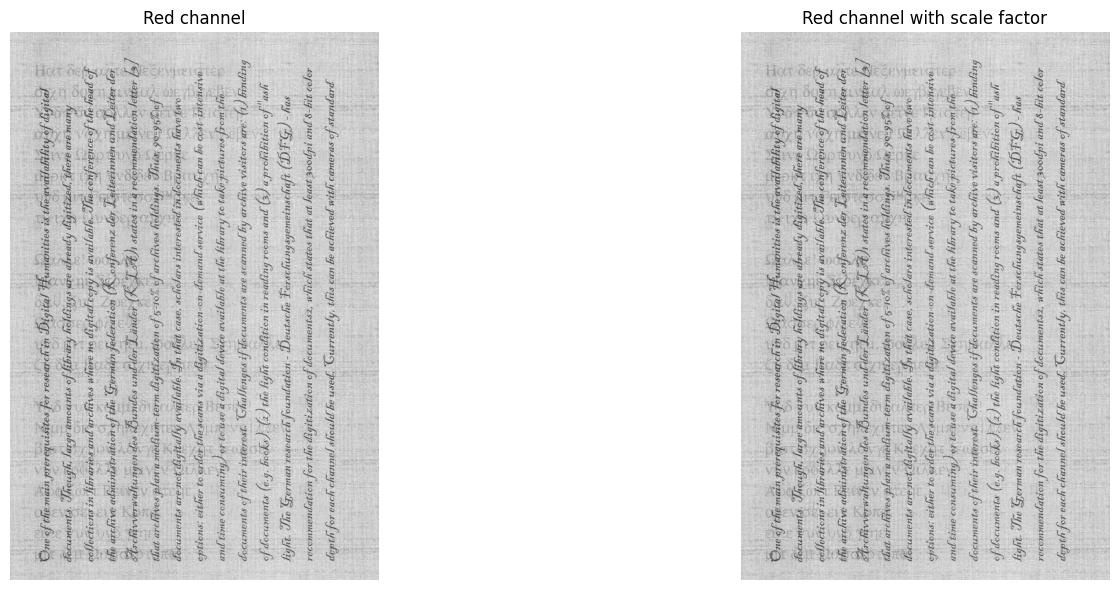

In [20]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(scale_factor * red_channel, cmap='gray')
plt.title('Red channel with scale factor')
plt.axis('off')

plt.tight_layout()

plt.show()

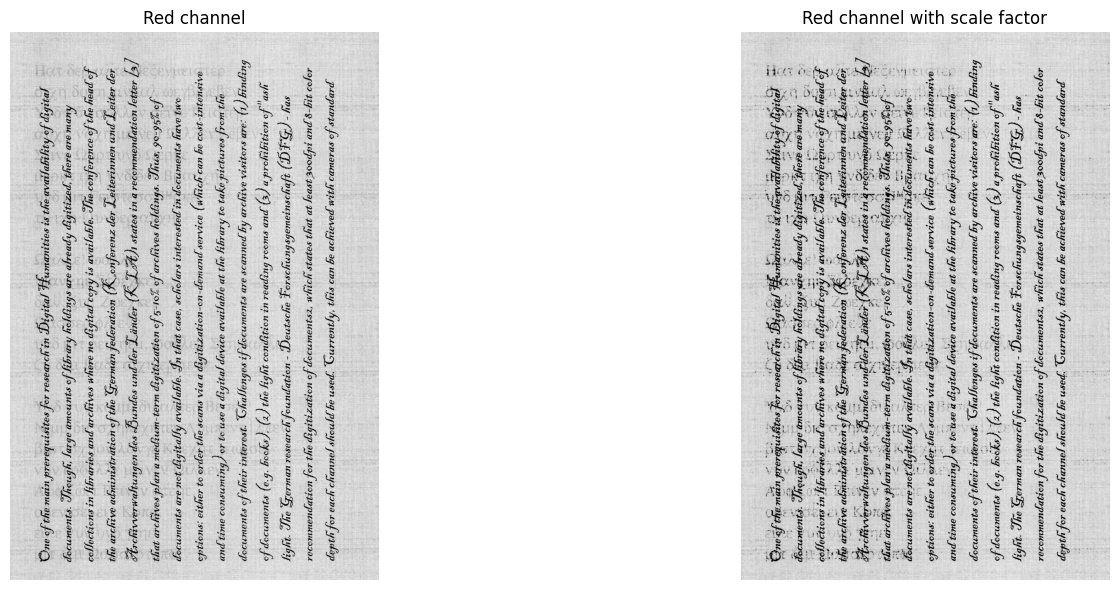

In [21]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.where(red_channel>150, red_channel, 0), cmap='gray')
plt.title('Red channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.where(scale_factor * red_channel > 220, scale_factor * red_channel, 0), cmap='gray')
plt.title('Red channel with scale factor')
plt.axis('off')

plt.tight_layout()

plt.show()

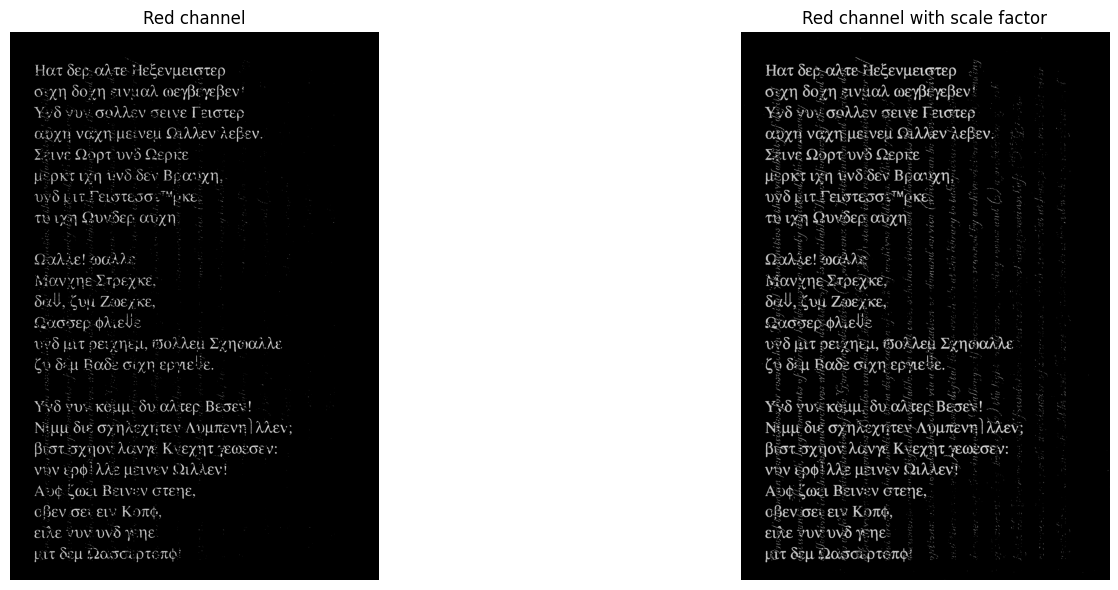

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.where(red_channel - blue_channel > 160, red_channel - blue_channel, 0), cmap='gray')
plt.title('Red channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.where(scale_factor * (red_channel - blue_channel) > 170, scale_factor * (red_channel - blue_channel), 0), cmap='gray')
plt.title('Red channel with scale factor')
plt.axis('off')

plt.tight_layout()

plt.show()